For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 

then give an example of what a true positive, true negative, type I and type II errors would look like. 

Note that some of the questions are intentionally phrased in a vague way. 

It is your job to reword these as more precise questions that could be tested.



##### Has the network latency gone up since we switched internet service providers?

null hypothisis - network latency has remained the same since the switch 
alternative hypotisis - new internet service provider is faster 

true positive (Null is false and we reject the null)

    - conclude the network is faster 

    - the network was always going to be faster  

true nagative (Null is true and we accept it)

    - conclude there is no change in the network 

    - we thought there would be no chnage  (Null is true and we accept it)

type 1 error (Null is true and we reject the null)

    - conclude the network is the same  
    
    - thought the network speed would be faster  

type 2 error (Null is false and we acept the null)
    
    - conclude the network remained the same 
    
    - always thought the network would stay the same  

##### Is the website redesign any good?

null hypothisis - the website redesine is not good 

alternative hypothisis - the webside redesine is great

True positive (Null is false and we reject the null)
    
    - website redsign is great 
    
    - website redesign was always going to be great 

true nagative (Null is true and we accept it)
    
    - websight redesign is not good 
    
    - we always knew the website redesign was not going to be good  

type 1 error (Null is true and we reject the null)
    
    - websight redesign is not good 
    
    - website redesign was suposed to be great 

type 2 error (Null is false and we acept the null)
    
    - websight redesign is great 
    
    - thought websight redesign was going to be bad



##### Is our television ad driving more sales?


null hypothisis - tv ad is not driving sales

alternative hypothisis - our tv ad is driving 4x the sales

True positive (Null is false and we reject the null)
    
    - ad is driving sales
    
    - always knew it would drive sales 

true nagative (Null is true and we accept it)
    
    - ad is not driving sales
    
    - we always knew the ad would not drive sales 

type 1 error (Null is true and we reject the null)
    
    - ad is not driving sales 
    
    - thought the ad would drive sales 

type 2 error (Null is false and we acept the null)
    
    - ad is driving sales 
    
    - thought the ad would not drive sales 

# Question 1 

### Answer with the type of stats test you would use (assume normal distribution):



Is there a relationship between the length of your arm and the length of your foot?

    - persons test or spearmans test beacuse they are two continues variables 


Does smoking affect when or not someone has lung cancer?
    
    - Non-parametric test because both predictive and outcome variables are categorial 
    chi squeared 


Is gender independent of a person’s blood type?

    - use logistic regression test, comparison of means test, or T test 
    - chia squared 


Does whether or not a person has a cat or dog affect whether they live in an apartment?
    
    - comparison of means test 
    - chia squared 



Does the length of time of the lecture correlate with a student's grade?

    - would use a Correlation test   
    persons test



In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pydataset import data
import seaborn as sns
import env


# Question 2

### Use the telco_churn data.

In [143]:
from env import user, host, password, host
def get_db_url(user, password, host, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return(url)

In [144]:
telco_churn = get_db_url(env.user, env.password, env.host, 'telco_churn')


### Does tenure correlate with monthly charges?

In [335]:
# filtered the dataframe in SQL so I do not have to do much filtering in python 

query1 = 'select tenure, monthly_charges from customers'
df = pd.read_sql(query1, telco_churn)


In [331]:
# state your hypothisis 
    # there is no lener relationship between tenure and monthly charges 
    # there is a lener relationship between tenure and monthly charges 

# set your alpha 
    # 0.05 because we want to be 95 percent certen 
alpha = 0.05


In [332]:
# see what kind of Dtpes I am working with 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, uses_a_macbook to does_not_use_a_macbook
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   code_up_student      2 non-null      int64
 1   not_code_up_student  2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


<Axes: xlabel='tenure', ylabel='monthly_charges'>

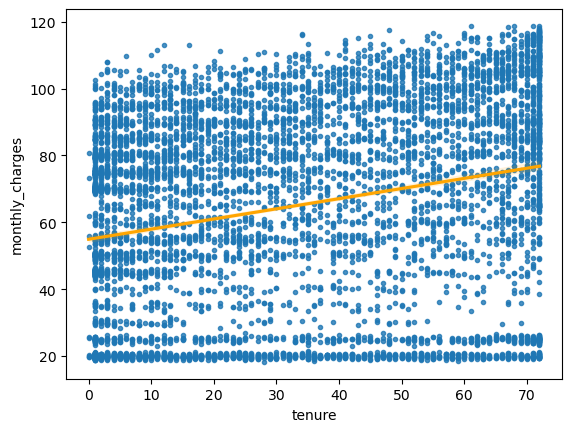

In [336]:
# Can plot and view the corralation between my two variables using a scaterplot 

sns.regplot(x='tenure', y='monthly_charges', data = df, marker='.', line_kws={'color' : 'orange'})


<Axes: >

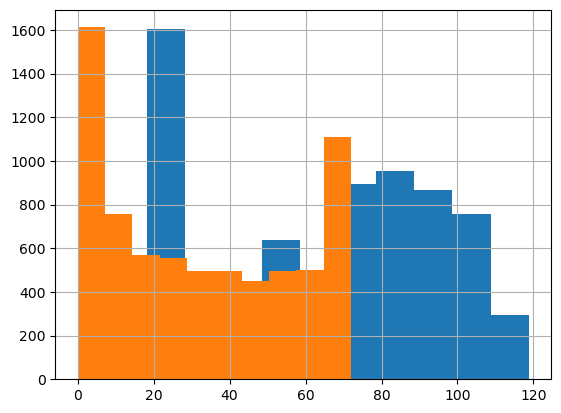

In [337]:
#visual test of distribution for monthly charges
df.monthly_charges.hist()

#visual test of distribution for tenure
df.tenure.hist()

In [338]:
#create a new function
def eval_dist(r, p, α=0.05):
    '''
    This function takes in r, p and alpha values
    then returns normal distribution print statement,
    if the p value is greater than alpha.
    Or not normal distribution print statement otherwise.
    '''
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [346]:
# You can use a Shapiro Test to confirm normalcy

r, p = stats.shapiro(df.monthly_charges)

r, p


/Users/ramirolopez/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9208889007568359, 0.0)

In [347]:
eval_dist(r,p)

The data is NOT normally distributed


In [344]:
#let's get the stats for tenure
r2, p2 = stats.shapiro(df.tenure)

#see those values
r2, p2

/Users/ramirolopez/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9037512540817261, 0.0)

In [345]:
eval_dist(r2, p2)

The data is NOT normally distributed


In [349]:
#Since our features are not normally distributed, use Spearman
sr,sp = stats.spearmanr(df.tenure, df.monthly_charges)
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [350]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [351]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


### Total charges?


In [ ]:
query2 = 'select tenure, total_charges from customers'
df_t = pd.read_sql(query2, telco_churn)
x11 = df_t.tenure
y11 = df_t.total_charges

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [ ]:
df_total['total_charges'] = df_t.total_charges.str.replace(' ', '0').astype(float)

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [ ]:
df_t.sample(10)

,tenure,total_charges
5780,49,5166.2
4760,61,3244.4
5131,17,1563.9
6850,1,53.95
3599,11,791.75
816,27,2462.55
3815,2,105.6
2838,49,2398.4
1244,50,5071.05
6255,25,1837.7


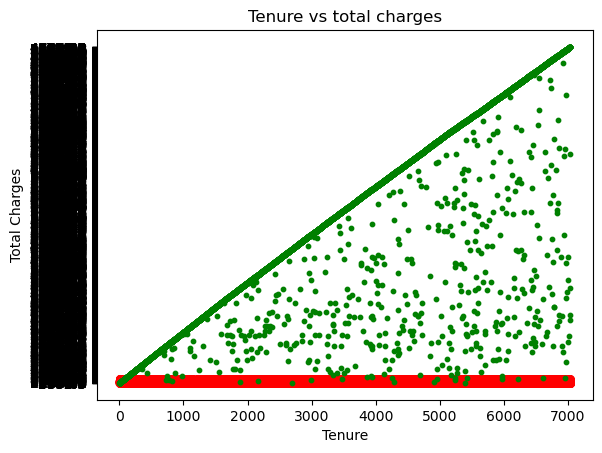

In [ ]:
plt.scatter(range(len(x11)), x11, s=30, c='red')
plt.scatter(range(len(y11)), y11, s=10, c='green')
plt.title('Tenure vs total charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

In [ ]:
alpha = 0.05
corr, p = stats.pearsonr(x11, float(y11))
corr, p

TypeError: cannot convert the series to <class 'float'>

In [ ]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

### What happens if you control for phone and internet service?


In [ ]:
query3 = 'select  from customers'
df_p = pd.read_sql(query3, telco_churn)
df_p.sample(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
1006,1453-RZFON,Female,0,No,Yes,1,Yes,No,1,Yes,...,No,No,No,No,1,No,2,49.90,49.9,No
979,1421-HCERK,Male,1,Yes,No,30,Yes,Yes,2,Yes,...,Yes,Yes,Yes,No,1,Yes,3,105.70,3181.8,No
3888,5469-CTCWN,Male,0,Yes,Yes,61,Yes,Yes,2,Yes,...,No,No,Yes,Yes,2,Yes,1,106.00,6547.7,Yes
2513,3590-TCXTB,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,20.35,20.35,No
5034,7077-XJMET,Male,0,Yes,No,12,Yes,No,1,No,...,Yes,Yes,Yes,Yes,1,Yes,1,74.15,741.4,No
5170,7272-QDCKA,Male,0,No,No,28,Yes,Yes,2,No,...,No,No,Yes,Yes,2,No,1,100.20,2688.45,No
3216,4612-THJBS,Female,1,No,No,56,Yes,Yes,2,No,...,Yes,No,Yes,Yes,2,Yes,3,104.75,5510.65,Yes
2897,4128-ETESU,Female,1,Yes,No,47,Yes,Yes,2,No,...,Yes,No,Yes,Yes,1,No,1,99.70,4747.2,No
4267,6008-NAIXK,Male,1,No,No,54,No,No phone service,1,No,...,Yes,No,Yes,Yes,2,Yes,1,55.45,2966.95,No
6707,9526-BIHHD,Male,0,No,No,1,No,No phone service,1,Yes,...,No,No,No,No,1,No,2,29.70,29.7,Yes


# Question 3

### Use the employees database.


In [ ]:
employees = get_db_url(env.user, env.password, env.host, 'employees')

query4 = '''SELECT hire_date, salary 
            FROM employees as e 
            JOIN salaries as s 
            ON e.emp_no = s.emp_no
            AND s.to_date > now()'''
df_e = pd.read_sql(query4, employees)
df_e.sample(10)


,hire_date,salary
235980,1993-02-22,79006
20896,1987-10-14,65377
103758,1985-10-19,64774
4183,1986-09-18,86041
200046,1989-06-17,68819
225991,1988-06-26,46183
62875,1995-04-06,70277
17573,1993-05-29,63001
17064,1993-04-21,54984
5207,1988-02-05,53326


### Is there a relationship between how long an employee has been with the company and their salary?


In [ ]:
# let's create a model decade column to make a cleaner aggregate.
# here I take the string version of the model_year and truncate the last digit
# I then add in "0's" for legibility.
df_e['decade'] = df_e.hire_date.apply(lambda x: str(x)[2] + '0\'s')


Text(-21.680555555555557, 0.5, 'Salary')

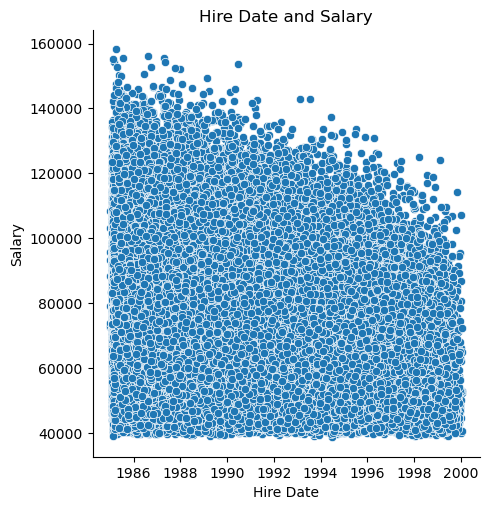

In [ ]:
sns.relplot(x='hire_date', y='salary', data=df_e)
plt.title('Hire Date and Salary')
plt.xlabel('Hire Date')
plt.ylabel('Salary')


In [ ]:
stats.pearsonr?

Signature: stats.pearsonr(x, y, *, alternative='two-sided')
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets. Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

This function also performs a test of the null hypothesis that the
distributions underlying the samples are uncorrelated and normally
distributed. (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)
The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.

Parame

In [ ]:
alpha3 = 0.05

corr, p = stats.pearsonr(df_e.hire_date, df_e.salary)
corr, p


TypeError: unsupported operand type(s) for +: 'float' and 'datetime.date'

In [ ]:
if p < alpha3:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [ ]:
query5 = '''SELECT hire_date, title 
            FROM employees as e 
            JOIN titles as t 
            ON e.emp_no = t.emp_no
            AND t.to_date > now()'''
df_et = pd.read_sql(query5, employees)
df_et.sample(10)

,hire_date,title
197074,1987-01-25,Senior Engineer
175707,1985-08-09,Senior Engineer
154106,1990-10-30,Senior Engineer
105626,1995-02-07,Staff
115529,1987-02-03,Senior Staff
154781,1990-10-25,Technique Leader
152351,1990-04-18,Senior Staff
152612,1991-01-16,Senior Staff
40073,1992-09-17,Senior Engineer
100267,1988-12-11,Senior Engineer


Text(-97.68055555555556, 0.5, 'Title')

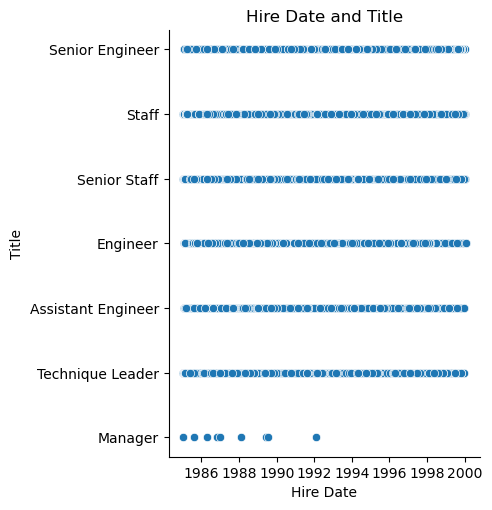

In [ ]:
sns.relplot(x='hire_date', y='title', data=df_et)
plt.title('Hire Date and Title')
plt.xlabel('Hire Date')
plt.ylabel('Title')

# Question 4

### Use the sleepstudy data.


In [ ]:
sleep_study = data('sleepstudy')
sleep_study.sample(10)

,Reaction,Days,Subject
90,237.2466,9,335
16,215.9618,5,309
86,254.6362,5,335
78,331.5229,7,334
162,272.4428,1,371
37,280.2396,6,330
117,379.4445,6,350
59,330.3003,8,332
139,375.6406,8,352
93,291.6112,2,337


### Is there a relationship between days and reaction time?


Text(4.944444444444445, 0.5, 'Reaction Time')

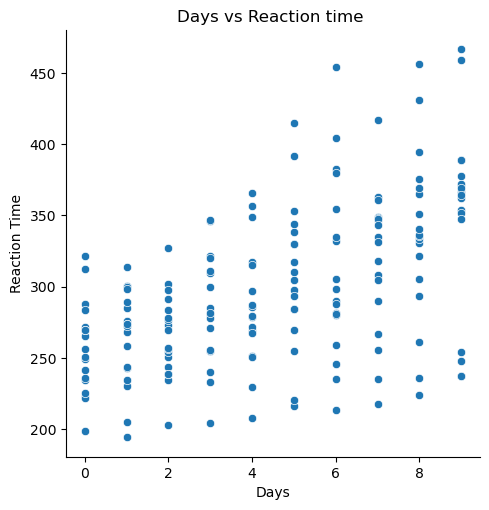

In [ ]:
sns.relplot(x='Days', y='Reaction', data=sleep_study)
plt.title('Days vs Reaction time ')
plt.xlabel('Days')
plt.ylabel('Reaction Time')

In [ ]:
a = 0.5

corr, p = stats.pearsonr(sleep_study.Days, sleep_study.Reaction)
corr, p



(0.5352302262650255, 9.89409632221439e-15)

In [ ]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


# Comparison of mean exersises 

In [ ]:
def eval_dist(r, p, α=0.05):
    '''
    This function takes in r, p and alpha values
    then returns normal distribution print statement,
    if the p value is greater than alpha.
    Or not normal distribution print statement otherwise.
    '''
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

# Question 1

### Answer with the type of test you would use (assume normal distribution):



### Is there a difference in grades of students on the second floor compared to grades of all students?
    - Grades of students on the second floor is a sample of the population 
    - Grades of all the students is the population 

    - both are continuous variables

    - One Sample T-test - comparing an observed mean to a thoretical one 


### Are adults who drink milk taller than adults who don't drink milk?

        - adults who drink milk is a sample
        - adults who do not drink milk is a sample 

        - both are continous variables 

        - Independant T-test (a.k.a. Two sample T-test) - comparing mean of group A to the mean of group B 


### Is the price of gas higher in Texas or in New Mexico?

        - Texas gas price is a sample 
        - New Mexico Gas price is a sample 

        - both are continous variables 
        
        - Independant T-test (a.k.a. Two sample T-test) - comparing mean of group A to the mean of group B 

### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?


        - ds student's stress is a sample 
        - wd student's stress is a sample 
        - ca student's stress if a sample 

        - all three are contunous variables 

        - ANOVA (analysis of variancs) - comparing the means of groups A, B, and C (more than 2)

# Question 2

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 


### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 


### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 


### Use a .05 level of significance.



In [ ]:
# is an independent 2 smapled T test 
# two tail 

# Form a null hypothisis and alternative hypothisis 

# - Null) office 1 sells homes at a faster rate
# - alternative) Both offices sell homes at the same rate 

In [221]:
# generate arrays for both offices 

office_1 = np.random.normal(90, 15, size =(40))
office_2 = np.random.normal(100, 20, size =(50))

In [224]:
# or 

office1 = stats.norm(90, 15).rvs(40)
office2 = stats.norm(100, 20).rvs(50)

In [ ]:
# can do some exploration 
x = np.arrage()

In [ ]:
# option 1 is to use the simulation 
# option 2 use ttest_ind_from_stats 

In [ ]:
# independant samples? 
# - Yes both are independent samples

# Normal Distrobution? 
# - Yes both have normal distrobution 

# Question 3 

### Load the mpg dataset and use it to answer the following questions:


In [158]:
from pydataset import data
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [159]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
202,toyota,toyota tacoma 4wd,2.7,1999,4,auto(l4),4,16,20,r,pickup
138,mercury,mountaineer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv



### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [ ]:
# NULL there is a differance in fuel-efficiency in cars from 2008 vs 1999
# there is not a difference in fuel-efficiency in cars from 2008 vs 1999

In [225]:
# created a new column for mean of cty and hwy

fuel_efficiency = mpg.hwy + mpg.cty / 2
mpg['fuel_efficiency'] = mpg.hwy + mpg.cty / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel-efficiency,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,38.0,38.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,39.5,39.5
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,41.0,41.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,40.5,40.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,34.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,37.5,37.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,39.5,39.5
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,34.0,34.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,35.0,35.0


In [226]:
mpg.year.unique()

array([1999, 2008])

In [230]:
fuel_2008 = mpg[mpg.year == 2008].fuel_efficiency
fuel_1999 = mpg[mpg.year == 1999].fuel_efficiency

In [233]:
# variantce 
# run a levene test 
# H0
# Ha 
lev_stat, p = stats.levene(fuel_1999, fuel_2008)

lev_stat, p

(0.022852900328726007, 0.8799715917302564)

In [180]:
t, p = stats.ttest_ind(sample_car_a, sample_car_b, equal_var=False)
t, p


31.86965811965812

In [ ]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


In [ ]:
if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")


In [ ]:
# independant samples?
# yes independand samples 

# Normal Distrobution?
# yes normal distrobution 

### Are compact cars more fuel-efficient than the average car?


In [237]:
compact_car = mpg[mpg['class'] == 'compact'].fuel_efficiency

u = mpg['fuel_efficiency'].mean()

In [239]:
t, p = stats.ttest_1samp(compact_car, u)

t, p

(8.24056790638155, 1.3102616430178035e-10)

In [ ]:
lev_stat, p = stats.levene(fuel_1999, fuel_2008)

lev_stat, p

In [ ]:
t, p = stats.ttest_ind(sample_car_a, sample_car_b, equal_var=False)
t, p


In [ ]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

In [ ]:
if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

### Do manual cars get better gas mileage than automatic cars?

In [242]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [244]:
automatic_car = mpg[mpg.trans.str.lower().str.startswith('a')].fuel_efficiency
manual_car = mpg[mpg.trans.str.lower().str.startswith('m')].fuel_efficiency




In [247]:
mpg.trans.str.lower().str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [203]:
manual = mpg['trans'].str.contains('man')


1      False
2       True
3       True
4      False
5      False
       ...  
230    False
231     True
232    False
233     True
234    False
Name: trans, Length: 234, dtype: bool

In [ ]:
t, p = stats.ttest_ind(manual, automatic, equal_var=False)
t, p

In [ ]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

In [ ]:
if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

# Exercise 3?

# Question 1

### Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.



#### Steps for chi squared testing 
#### 1) write down your null and alt hypothisis 
#### 2) define your alpha 
#### 3) crosstab
#### 4) chi2, p, degf, expected = stats.chi2_contingency(observed)
#### 5) reject or fail to reject the null hypothisis

In [ ]:
# null there is no relationship between attending code up and using a macbook (independent)
# alt there is a relationship between attending code up and using a macbook (not independant)

In [261]:
aplha = 0.05

In [ ]:
df = pd.DataFrame({'code_up_student': [49, 1],
                   'not_code_up_student': [20, 30],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})

In [326]:
# initialize data of lists.
data = {'code_up_student': [49, 1],
		'not_code_up_student': [20, 30]}

# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['uses_a_macbook',
							'does_not_use_a_macbook'])

# print the data
df



,code_up_student,not_code_up_student
uses_a_macbook,49,20
does_not_use_a_macbook,1,30


In [353]:
chi2, p, degf, expected = stats.chi2_contingency(df)
p

0.0

In [354]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


# Question 2
 
### Choose another 2 categorical variables from the mpg dataset.



In [248]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [249]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [250]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,14,19,r,suv
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
153,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv


In [ ]:
# I choose cyl and class 

#### State your null and alternative hypotheses.
    - there is no relationship between the class of car and number of cyl

In [251]:
# State your alpha.

alpha = 0.05 


In [253]:
# Perform a chi2 test of independence.

observed = pd.crosstab(mpg['class'], mpg['cyl'])
observed

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


In [255]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.5351076620141742e-20

In [256]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


# Question 3 

### Use the data from the employees database to answer these questions:




In [278]:
from env import user, host, password, host
def get_db_url(user, password, host, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return(url)

In [279]:
employees = get_db_url(env.user, env.password, env.host, 'employees')


query1 = 'select * from employees limit 1'
emp = pd.read_sql(query1, employees)
emp

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [283]:
employees = get_db_url(env.user, env.password, env.host, 'employees')


query11 = '''
SELECT gender, dept_name 
FROM employees as e
JOIN dept_emp as de
ON e.emp_no = de.emp_no 
JOIN departments as d
ON de.dept_no = d.dept_no
WHERE de.to_date > now();
'''

emp_g_sm = pd.read_sql(query11, employees)
emp_g_sm


,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [287]:
emp_g_sm.dept_name.unique()

array(['Customer Service', 'Development', 'Finance', 'Human Resources',
       'Marketing', 'Production', 'Quality Management', 'Research',
       'Sales'], dtype=object)

In [288]:
emp_g_sm.dept_name.value_counts()

dept_name
Development           61386
Production            53304
Sales                 37701
Customer Service      17569
Research              15441
Marketing             14842
Quality Management    14546
Human Resources       12898
Finance               12437
Name: count, dtype: int64

In [307]:
#create column for automatic transmission
emp_g_sm['marketing_or_sales'] = emp_g_sm.dept_name.str.startswith('S') | emp_g_sm.dept_name.str.startswith('M')
emp_g_sm.marketing_or_sales

0         False
1         False
2         False
3         False
4         False
          ...  
240119     True
240120     True
240121     True
240122     True
240123     True
Name: marketing_or_sales, Length: 240124, dtype: bool

In [ ]:
# null there is no relationship 
# alt there is a relationship 

In [308]:
alpha = 0.05

In [309]:
observed = pd.crosstab(emp_g_sm.gender, emp_g_sm.marketing_or_sales)
observed

marketing_or_sales,False,True
gender,,
F,75147,20863
M,112434,31680


In [310]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.143911663394633

In [311]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


### Is an employee's gender independent of whether or not they are or have been a manager?


In [314]:
employees = get_db_url(env.user, env.password, env.host, 'employees')


query12 = '''
SELECT gender, title 
FROM employees as e
JOIN titles as t
ON e.emp_no = t.emp_no 
WHERE t.to_date > now();
'''
emp_gm = pd.read_sql(query12, employees)
emp_gm

,gender,title
0,M,Senior Engineer
1,F,Staff
2,M,Senior Engineer
3,M,Senior Engineer
4,M,Senior Staff
...,...,...
240119,F,Engineer
240120,M,Senior Engineer
240121,M,Senior Engineer
240122,M,Senior Staff


In [315]:
emp_gm.title.unique()

array(['Senior Engineer', 'Staff', 'Senior Staff', 'Engineer',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [316]:
emp_gm['manager'] = emp_gm.title.str.startswith('M') 
emp_gm


,gender,title,manager
0,M,Senior Engineer,False
1,F,Staff,False
2,M,Senior Engineer,False
3,M,Senior Engineer,False
4,M,Senior Staff,False
...,...,...,...
240119,F,Engineer,False
240120,M,Senior Engineer,False
240121,M,Senior Engineer,False
240122,M,Senior Staff,False


In [ ]:
# null there is no relationship 
# there is a relationship 

In [317]:
alpha = 0.05

In [318]:
observed = pd.crosstab(emp_gm.gender, emp_gm.manager)
observed

manager,False,True
gender,,
F,96006,4
M,144109,5


In [319]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.0

In [320]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis
